**Pharmaceutical Sales prediction across multiple stores**

1.  **Introduction**

      Sales forecasting is the process of estimating future revenue by predicting the amount of product or services a sales unit will sell in the next week, month, quarter, or year. Machine Learning is used in Business Forecasting to increase the efficiency of the business. Rossmann Pharmaceuticals is one of the company which sales in all their stores across several cities six weeks ahead of time. Managers in individual stores rely on their years of experience as well as their personal judgment to forecast sales. But sometimes these managers assumption may negatively affect the sales.

      In this study Exploration of customer purchasing behavior, Prediction of store sales using machine learning and deep learning has been performed on the pharmacy data. Furthermore, Serving predictions on a web interface is attemepted.

2.  **Objective of the study**

      General and specific objectives of the research given in the following two section 2.1 and 2.2 respectively.

2.1 General Objective

      The objective of this project is to build and serve an end-to-end product that delivers this prediction to analysts in the finance team.

2.2 Specific Objective

      In order to accomplish the general objective, the following specific objectives are formulated.

      ü Exploration of customer purchasing behavior
      ü Log your steps using the logger library in python.
      ü Prediction of store sales
      ü Building models using machine learning and deep learning
      ü Using MLFlow to serve the prediction and deployment of the prediction system   

3.   **Methods**

      In order to realize the stated objective, different methodologies and tools are applied. These are data cleaning: building pipelines to detect and handle outlier and missing data, exploratory data analysis for understanding user purchasing behavior, building models with sklearn pipelines and performance evaluation.

      Three machine learning models, Logistic Regression, Random Forest, Decision Tree, and and LSTM deep learning model  are used to predict sales and customer numbers. To log each steps the logger library in python is used.

4.    **Explanatory Data Analysis:** Exploration of customer purchasing behavior


      



In [262]:
#Import Important Librabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [263]:
# Load the data
sample_submission_data=pd.read_csv("/content/drive/MyDrive/DIGICHROME/sample_submission.csv")
store_data = pd.read_csv("/content/drive/MyDrive/DIGICHROME/store.csv")
train_data = pd.read_csv("/content/drive/MyDrive/DIGICHROME/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/DIGICHROME/test.csv")

<ipython-input-263-a2a22ad95bfd>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/content/drive/MyDrive/DIGICHROME/train.csv")


In [264]:
sample_submission_data

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [265]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [266]:
sample_submission_data.describe()


,Id,Sales
count,41088.000000,41088.0
mean,20544.500000,0.0
std,11861.228267,0.0
min,1.000000,0.0
25%,10272.750000,0.0
50%,20544.500000,0.0
75%,30816.250000,0.0
max,41088.000000,0.0


In [267]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [268]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [269]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [270]:
sample_submission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


In [271]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [272]:
Promo2SinceYear_counts=store_data['Promo2SinceYear'].value_counts()
Promo2SinceYear_counts

2011.0    128
2013.0    120
2014.0     95
2012.0     81
2009.0     73
2010.0     64
2015.0     10
Name: Promo2SinceYear, dtype: int64

In [273]:
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [274]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [275]:
# columns for each data
print(f'\t Store Columns \n{list(store_data.columns)}\n')
print(f'\t Train Columns \n{list(train_data.columns)}\n')
print(f'\t Test Columns\n {list(test_data.columns)}\n')
print(f'\t Submission Columns\n {list(sample_submission_data.columns)}')


	 Store Columns 
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

	 Train Columns 
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

	 Test Columns
 ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

	 Submission Columns
 ['Id', 'Sales']


In [276]:
# shape for each data
print(f'\t Store shape: {store_data.shape}\n')
print(f'\t Train shape: {train_data.shape}\n')
print(f'\t Test shape: {test_data.shape}\n')
print(f'\t Sample Submission shape: {sample_submission_data.shape}')

	 Store shape: (1115, 10)

	 Train shape: (1017209, 9)

	 Test shape: (41088, 8)

	 Sample Submission shape: (41088, 2)


In [277]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [278]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [279]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There is no such null values present in Train Data

Each feature in Train data represent the sales of store

In [280]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [281]:
# Handle the null values
test_data['Open']=test_data['Open'].fillna(test_data['Open'].mean())


In [282]:
test_data.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [283]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [284]:
store_data['PromoInterval']

0                    NaN
1        Jan,Apr,Jul,Oct
2        Jan,Apr,Jul,Oct
3                    NaN
4                    NaN
              ...       
1110     Jan,Apr,Jul,Oct
1111                 NaN
1112                 NaN
1113                 NaN
1114    Mar,Jun,Sept,Dec
Name: PromoInterval, Length: 1115, dtype: object

In [285]:
store_data['CompetitionOpenSinceMonth'].value_counts()

9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64

In [286]:
store_data['CompetitionOpenSinceYear'].values


array([2008., 2007., 2006., ...,   nan,   nan,   nan])

Filling the missing values


In [287]:
# No particular pattern observed. In this case, it makes a complete sense to replace NaN with the median values
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)


In [288]:
store_data.fillna(0, inplace = True)
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [289]:
sample_submission_data.isnull().sum()

Id       0
Sales    0
dtype: int64

**There ia no such null values present in the sample_submission_data **

In [290]:
state_holiday_counts = train_data['StateHoliday'].value_counts()
school_holiday_counts = train_data['SchoolHoliday'].value_counts()
open_closed_counts = train_data['Open'].value_counts()

print('StateHoliday Count:')
print(state_holiday_counts)
print("*"*40)

print('School Holiday Counts:')
print(school_holiday_counts)
print("*"*40)

print("Open Closed Counts:")
print(open_closed_counts)



StateHoliday Count:
0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
****************************************
School Holiday Counts:
0    835488
1    181721
Name: SchoolHoliday, dtype: int64
****************************************
Open Closed Counts:
1    844392
0    172817
Name: Open, dtype: int64


Sales on closed Date

In [291]:
sales_on_closed_date = train_data[train_data['Open']==0]
sales_on_closed_date

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [292]:
closed_sale = sales_on_closed_date['Sales']

total_closed_sales = closed_sale.sum()
total_closed_sales


0

There is no sales on closed date

In [293]:
train = pd.read_csv('/content/drive/MyDrive/DIGICHROME/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("/content/drive/MyDrive/DIGICHROME/store.csv",
                    low_memory = False)

train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train['Dates']=train.apply(lambda x:'%s-%s-%s' % (x['Year'],x['Month'],x['Day']),axis=1)
train['Dates']=pd.to_datetime(train['Dates'])

train_store = pd.merge(train, store, how = 'inner', on = 'Store')

#data_frame = pd.read_csv("train.csv")
train = pd.read_csv('/content/drive/MyDrive/DIGICHROME/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("/content/drive/MyDrive/DIGICHROME/store.csv",
                    low_memory = False)

train_store

<ipython-input-293-57fa4450ec90>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/drive/MyDrive/DIGICHROME/train.csv',  parse_dates=[2],index_col = 'Date')
<ipython-input-293-57fa4450ec90>:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train['WeekOfYear'] = train.index.weekofyear
<ipython-input-293-57fa4450ec90>:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/drive/MyDrive/DIGICHROME/train.csv',  parse_dates=[2],index_col = 'Date')


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,2013-01-05,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,2013-01-04,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,2013-01-03,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,2013-01-02,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


Sales of each store on monthly basic

In [294]:
store_sale_month = train_store.pivot_table(index='Month',columns='StoreType',values='Sales',aggfunc='mean')
store_sale_month.columns= [f'Store-{col} Sale' for col in store_sale_month.columns]
store_sale_month.reset_index(inplace=True)
display(store_sale_month)

,Month,Store-a Sale,Store-b Sale,Store-c Sale,Store-d Sale
0,1,5440.321622,9067.295383,5418.967088,5352.560283
1,2,5626.986849,9631.862745,5601.013514,5500.918138
2,3,5748.996660,9840.685009,5725.103458,5673.283031
3,4,5718.125028,10097.420261,5658.500375,5596.009036
4,5,5419.004537,10459.871600,5429.085804,5394.785410
5,6,5723.595663,10356.075817,5627.827628,5657.755492
6,7,6032.583774,10175.588387,5935.111028,5967.260443
7,8,5670.392339,9528.931574,5632.468771,5556.152164
8,9,5564.154821,9723.497980,5459.672222,5409.183686
9,10,5522.095766,10064.788856,5459.490048,5356.854026


In [295]:
months = store_sale_month['Month']
store_a_sale = store_sale_month['Store-a Sale']
store_b_sale = store_sale_month['Store-b Sale']
store_c_sale = store_sale_month['Store-c Sale']
store_d_sale = store_sale_month['Store-d Sale']


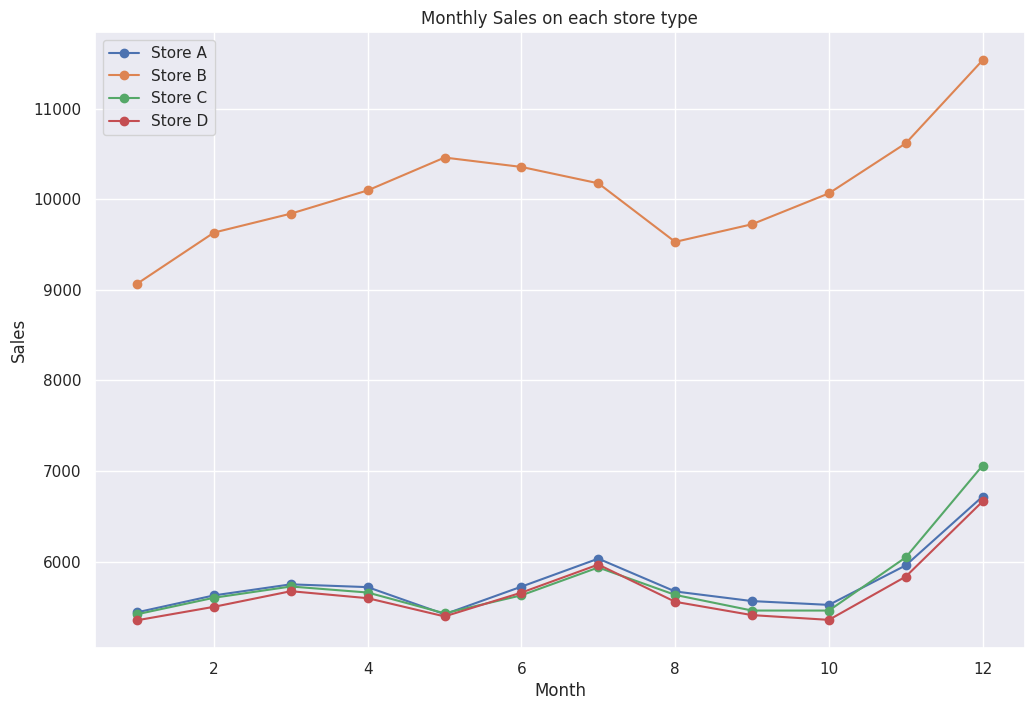

In [296]:
plt.figure(figsize=(12,8))
plt.plot(months,store_a_sale,label='Store A',marker='o')
plt.plot(months,store_b_sale,label='Store B',marker='o')
plt.plot(months,store_c_sale,label='Store C',marker='o')
plt.plot(months,store_d_sale,label='Store D',marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales on each store type')
plt.legend()
plt.show()

From the above plot shows that store A,store C,store D have similar sales behaviour but store B have most sales behaviour as compared to A,C,D


**Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?**

In [297]:
train_promotion_counts =train_data['Promo'].value_counts()
train_promotion_proportion = train_promotion_counts/len(train_data)*100
print('Training Set Promotion Distribution')
print(train_promotion_counts)
print(train_promotion_proportion)

Training Set Promotion Distribution
0    629129
1    388080
Name: Promo, dtype: int64
0    61.848548
1    38.151452
Name: Promo, dtype: float64


In [298]:
test_promotion_counts =test_data['Promo'].value_counts()
test_promotion_proportion = test_promotion_counts/len(test_data)*100
print('Test Set Promotion Distribution')
print(test_promotion_counts)
print(test_promotion_proportion)

Test Set Promotion Distribution
0    24824
1    16264
Name: Promo, dtype: int64
0    60.416667
1    39.583333
Name: Promo, dtype: float64


<ipython-input-299-bbd53e4056e1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Promo'],ax=axes[0])
<ipython-input-299-bbd53e4056e1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Promo'],ax=axes[1])


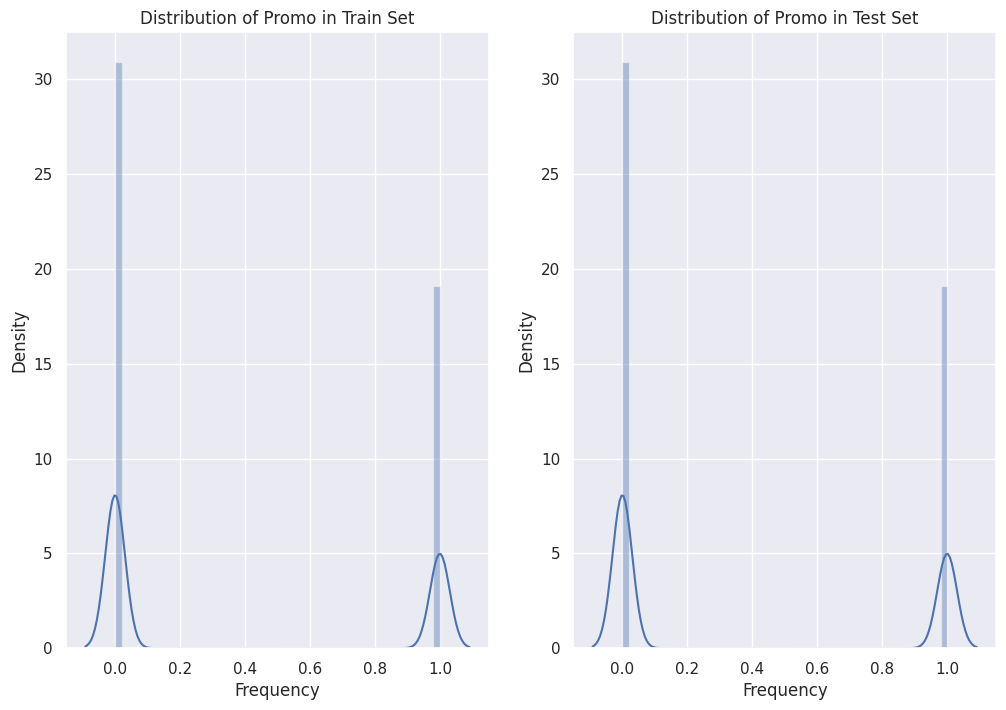

In [299]:
fig,axes = plt.subplots(1,2,figsize=(12,8))
# plot distribution of promotion in training set

sns.distplot(train_data['Promo'],ax=axes[0])
axes[0].set_title("Distribution of Promo in Train Set")
axes[0].set_xlabel("Promotion")
axes[0].set_xlabel("Frequency")

# plot distribution of promotion in training set
sns.distplot(train_data['Promo'],ax=axes[1])
axes[1].set_title("Distribution of Promo in Test Set")
axes[1].set_xlabel("Promotion")
axes[1].set_xlabel("Frequency")
plt.show()

**Check and compare sales behaviour before,during and after holidays**

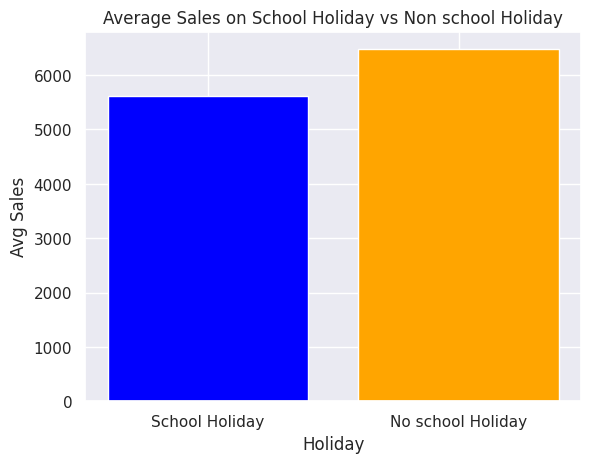

In [300]:
school_data_agg = train_store.groupby("SchoolHoliday")["Sales"].mean()
school_data_agg.index=["School Holiday","No school Holiday"]
colors = ["blue","orange"]
plt.bar(school_data_agg.index,school_data_agg.values,color=colors)
plt.xlabel("Holiday")
plt.ylabel("Avg Sales")
plt.title("Average Sales on School Holiday vs Non school Holiday")
plt.show()

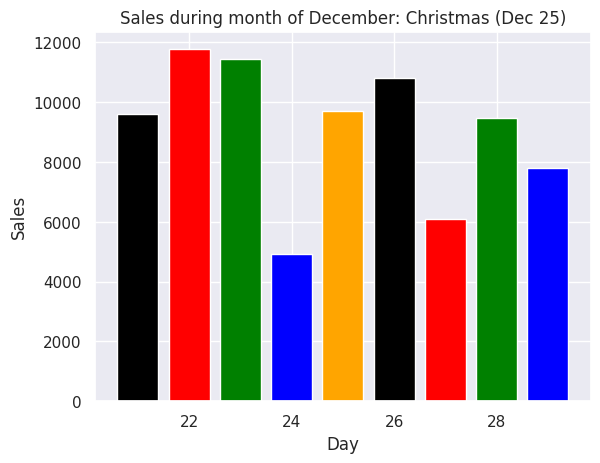

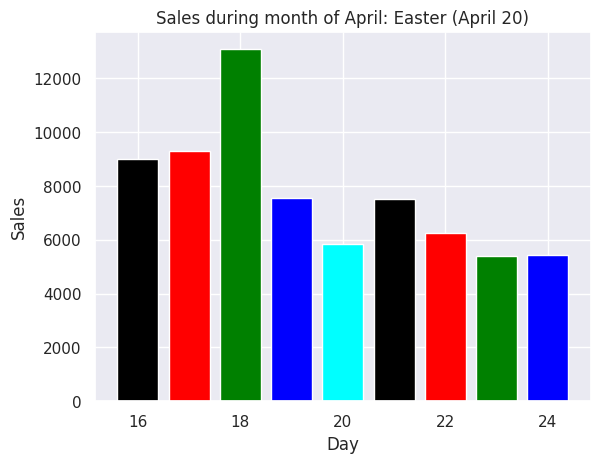

In [301]:
open_store = train_store[(train_store.Open == 1) & (train_store.Year == 2014)]

christmass_month = 12
eastern_month = 4

christmass_month = open_store[open_store.Month == christmass_month]
eastern_month = open_store[open_store.Month == eastern_month]

# plot.bar(chris['Day'], chris['Sales'], 'Sales during month of December: Christmas (Dec 25)')
# plot.bar(eastern['Day'], eastern['Sales'], 'Sales during month of April: Eastern (April 20)')

around_christmas = christmass_month[(christmass_month['Day'] > 20) & (christmass_month['Day'] < 30)]
around_christmas = around_christmas[['Day', 'Sales']].groupby('Day').mean()


around_eastern = eastern_month[(eastern_month['Day'] > 15) & (eastern_month['Day'] < 25)]
around_eastern = around_eastern[['Day', 'Sales']].groupby('Day').mean()

plt.bar(around_christmas.index, around_christmas['Sales'],color=['black', 'red', 'green', 'blue', 'orange'])


plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("Sales during month of December: Christmas (Dec 25)")
plt.show()

plt.bar(around_eastern.index, around_eastern['Sales'],color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("Sales during month of April: Easter (April 20)")
plt.show()

There were more sales before and after the Holidays, rather than on the holidays



**What can you say about the correlation between sales and number of customers?**

<Axes: >

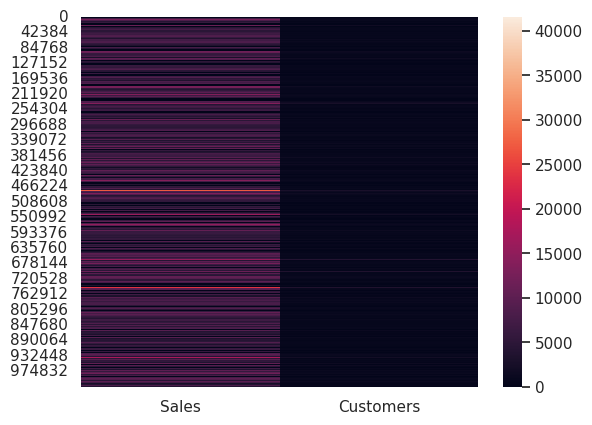

In [302]:
sns.heatmap(train_store[['Sales', 'Customers']])

 There is a high correlation b/n Sales and Customers. The more customers the more sales

**How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers**

In [303]:
pip install -U seaborn


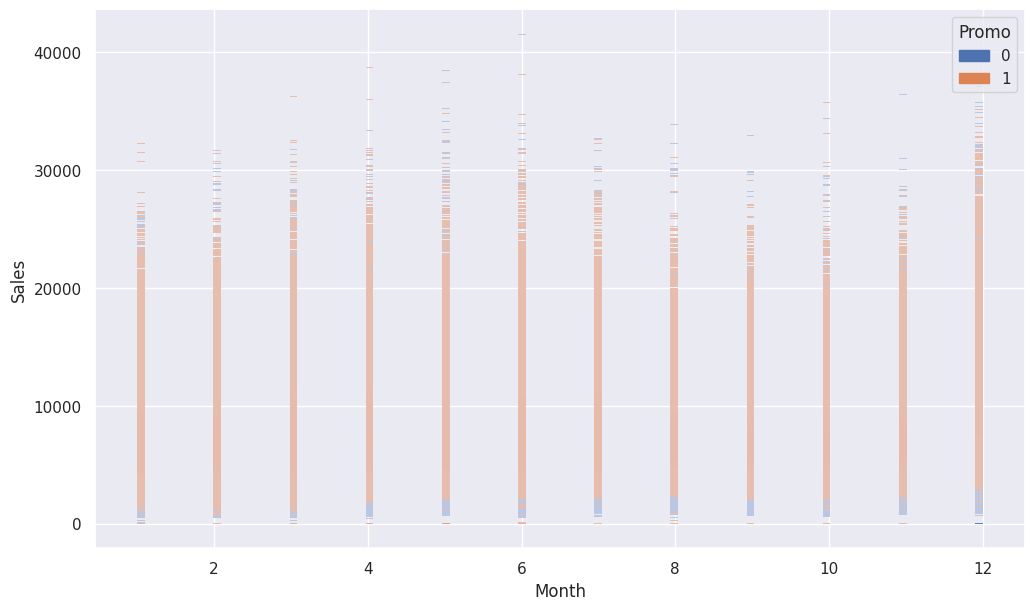

In [304]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
sns.histplot(data = train_store, x ="Month", y = "Sales",
               hue = 'Promo')
plt.show()

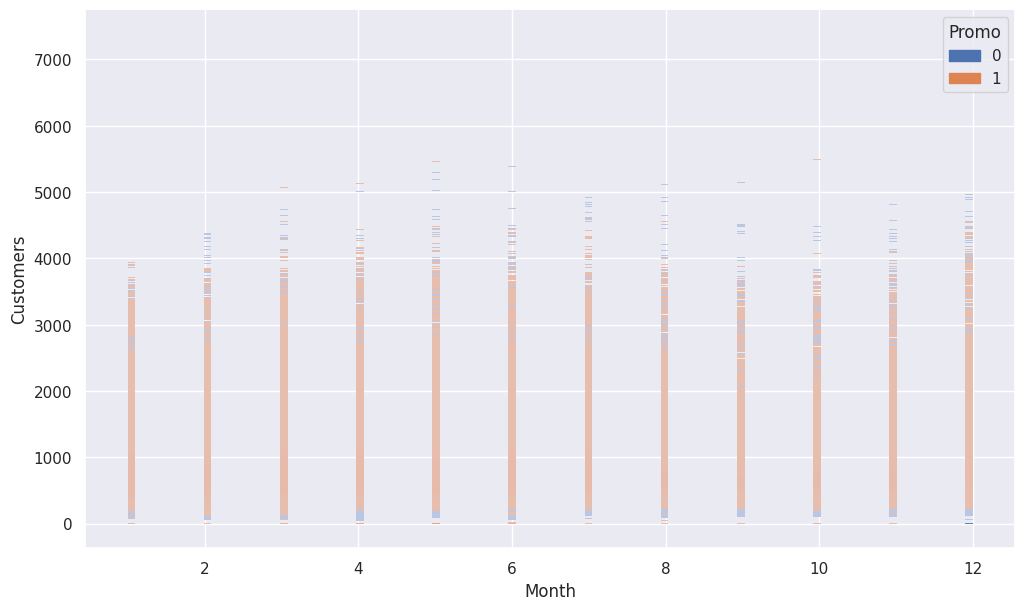

In [305]:
plt.figure(figsize=(12,7))
sns.histplot(data = train_store, x ="Month", y = "Customers",
               hue = 'Promo')

plt.show()

**Could the promos be deployed in more effective ways? Which stores should promos be deployed in?**

Number of Stores with less than 5143.545555555555 mean sales are 112


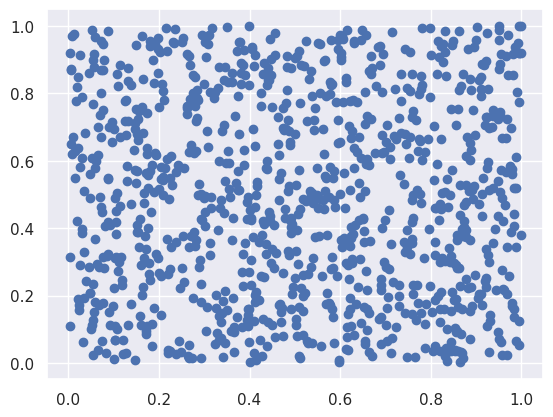

In [306]:
'''
Promo should be deployed on stores which have __ sales and __ customers (more, **less)?
'''

store_with_promo = train_store[train_store.Promo == 1]
result = store_with_promo[['Store','Sales', 'Customers']].groupby('Store').agg({"Sales":"mean", 'Customers':'sum'})

low_sales = result['Sales'].quantile(0.1) # least 10 percent sales
small_sales = result[(result['Sales'] <= low_sales)]

print(f"Number of Stores with less than {low_sales} mean sales are {small_sales.shape[0]}")
N = 1000
Store = np.random.rand(N)
Sales = np.random.rand(N)
colors = np.random.rand(N)

plt.scatter(Store,Sales)

plt.show()


**Trends of customer behavior during store open and closing times**

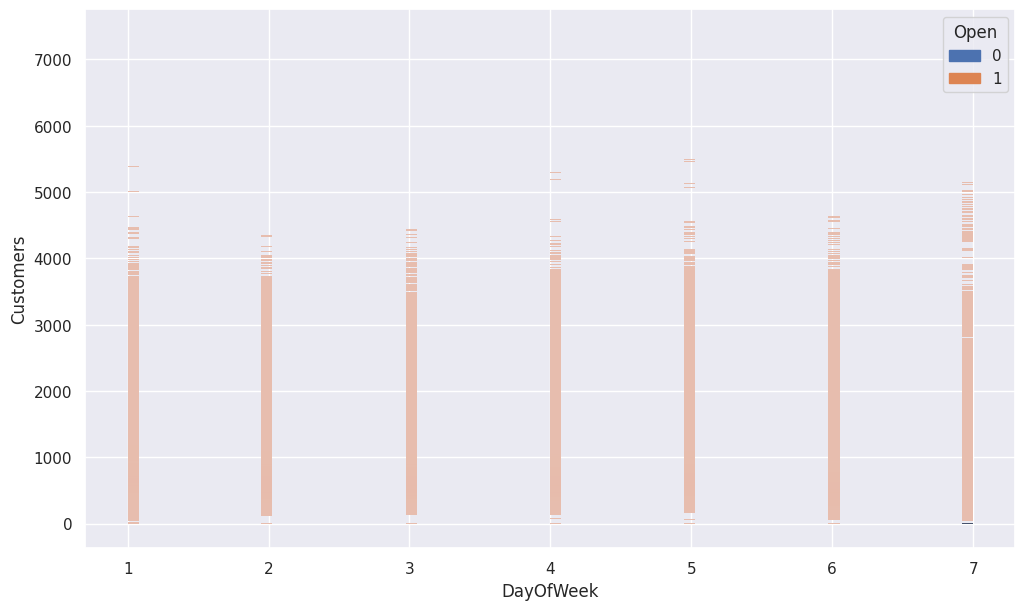

In [307]:
plt.figure(figsize=(12,7))
sns.histplot(data = train_store, x ="DayOfWeek", y = "Customers",
               hue = 'Open')
plt.show()

**Which stores are opened on all weekdays? How does that affect their sales on weekends
**

Stores That work all Week are : 33


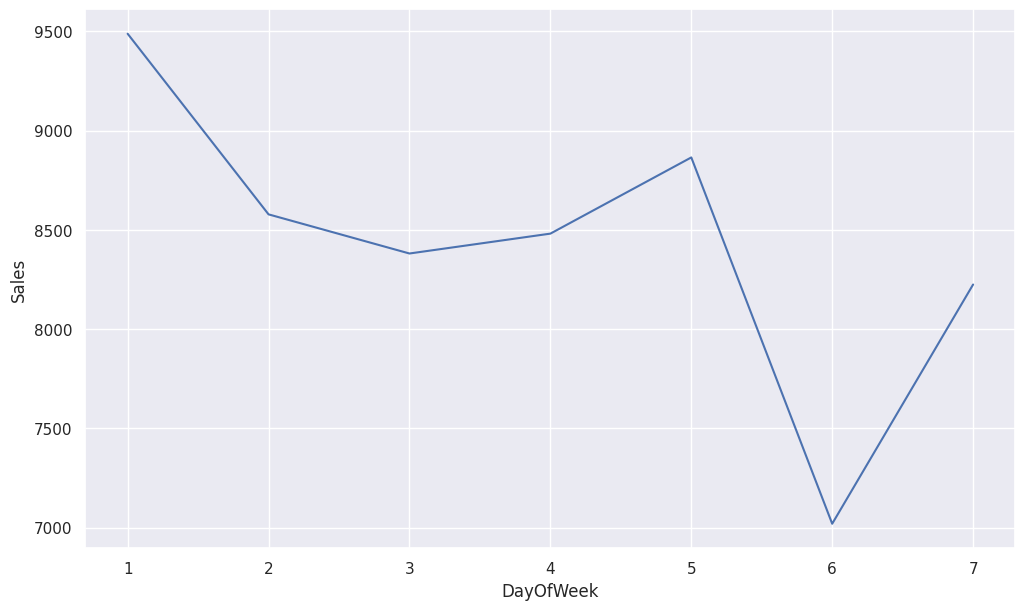

In [308]:
# stores, where their unique DayOfWeek count to 7
open_stores = train_store[train_store.Open == 1]
each_day = open_stores[['Store', 'DayOfWeek']].groupby('Store').nunique()

all_week_stores = each_day[each_day.DayOfWeek == 7]
stores_id = all_week_stores.reset_index()['Store']

get_stores = open_stores[(open_stores.Store.isin(set(stores_id)))]
get_stores = get_stores[['Store', 'Sales', 'Customers', 'DayOfWeek']]

week_sales = get_stores.groupby('DayOfWeek').mean().reset_index()

plt.figure(figsize=(12,7))
sns.lineplot(data = week_sales, x ="DayOfWeek", y = "Sales")

print(f'Stores That work all Week are : {all_week_stores.shape[0]}')

we have about 33 stores that work on all weedays, and the sales on week ends show rise from Saturday to sunday


**How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?**

<Axes: >

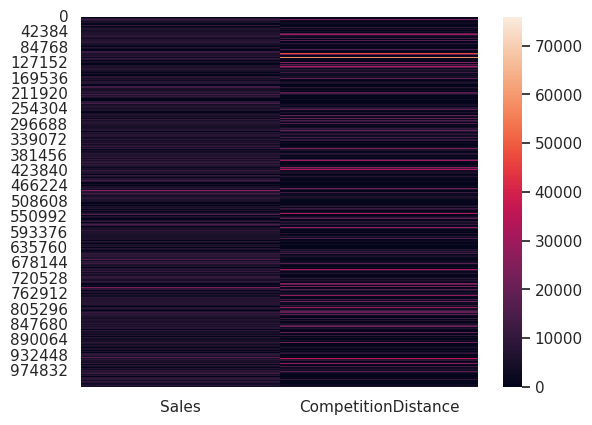

In [316]:
columns = train_store[['Sales', 'CompetitionDistance']]
sns.heatmap(columns)